# 注释

## 使用文本框进行注释

先看一个简单的例子：

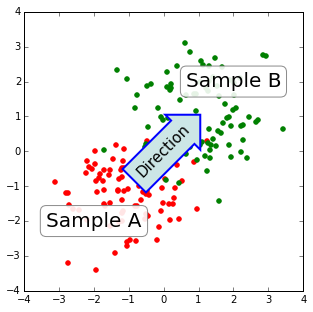

In [1]:
import numpy.random
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(1, figsize=(5,5))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

# 加上两个文本框
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)

# 加上一个箭头文本框
bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.show()

`text()` 函数接受 `bbox` 参数来绘制文本框。
```python
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)
```

可以这样来获取这个文本框，并对其参数进行修改：
```python
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)
```

可用的文本框风格有：

class|name|attrs
---|---|---
LArrow	|larrow	|pad=0.3
RArrow	|rarrow	|pad=0.3
Round	|round	|pad=0.3,rounding_size=None
Round4	|round4	|pad=0.3,rounding_size=None
Roundtooth	|roundtooth	|pad=0.3,tooth_size=None
Sawtooth	|sawtooth	|pad=0.3,tooth_size=None
Square	|square	|pad=0.3

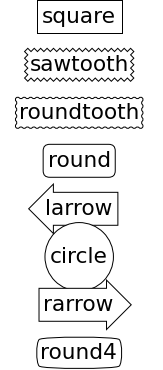

In [2]:
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt

styles = mpatch.BoxStyle.get_styles()

figheight = (len(styles)+.5)
fig1 = plt.figure(figsize=(4/1.5, figheight/1.5))
fontsize = 0.3 * 72
ax = fig1.add_subplot(111)

for i, (stylename, styleclass) in enumerate(styles.items()):
    ax.text(0.5, (float(len(styles)) - 0.5 - i)/figheight, stylename,
              ha="center",
              size=fontsize,
              transform=fig1.transFigure,
              bbox=dict(boxstyle=stylename, fc="w", ec="k"))

# 去掉轴的显示
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.xticks([])
plt.yticks([])

plt.show()

各个风格的文本框如上图所示。

## 使用箭头进行注释

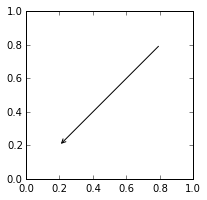

In [3]:
plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), 
            )

plt.show()

之前介绍了 `annotate` 中 `xy, xycoords, xytext, textcoords` 参数的含义，通常我们把 `xy` 设在 `data` 坐标系，把 `xytext` 设在 `offset` 即以注释点为原点的参考系。

箭头显示是可选的，用 `arrowprops` 参数来指定，接受一个字典作为参数。

不同类型的绘制箭头方式：

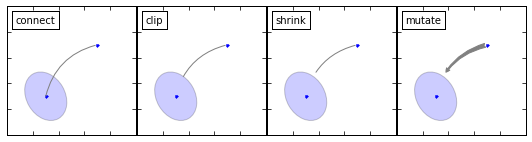

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)


ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)


ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

字典中，`connectionstyle` 参数控制路径的风格：

Name | Attr
----|----
angle|	angleA=90,angleB=0,rad=0.0
angle3|	angleA=90,angleB=0
arc|	angleA=0,angleB=0,armA=None,armB=None,rad=0.0
arc3|	rad=0.0
bar|	armA=0.0,armB=0.0,fraction=0.3,angle=None

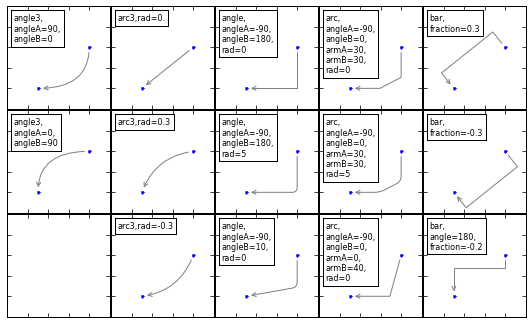

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure(1, figsize=(8,5))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=8)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (3, 5), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)


x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7


def demo_con_style(ax, connectionstyle, label=None):

    if label is None:
        label = connectionstyle

    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    add_at(ax, label, loc=2)

column = grid.axes_column[0]

demo_con_style(column[0], "angle3,angleA=90,angleB=0",
               label="angle3,\nangleA=90,\nangleB=0")
demo_con_style(column[1], "angle3,angleA=0,angleB=90",
               label="angle3,\nangleA=0,\nangleB=90")



column = grid.axes_column[1]

demo_con_style(column[0], "arc3,rad=0.")
demo_con_style(column[1], "arc3,rad=0.3")
demo_con_style(column[2], "arc3,rad=-0.3")



column = grid.axes_column[2]

demo_con_style(column[0], "angle,angleA=-90,angleB=180,rad=0",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=0")
demo_con_style(column[1], "angle,angleA=-90,angleB=180,rad=5",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=5")
demo_con_style(column[2], "angle,angleA=-90,angleB=10,rad=5",
               label="angle,\nangleA=-90,\nangleB=10,\nrad=0")


column = grid.axes_column[3]

demo_con_style(column[0], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=0")
demo_con_style(column[1], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=5")
demo_con_style(column[2], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=0,\narmB=40,\nrad=0")


column = grid.axes_column[4]

demo_con_style(column[0], "bar,fraction=0.3",
               label="bar,\nfraction=0.3")
demo_con_style(column[1], "bar,fraction=-0.3",
               label="bar,\nfraction=-0.3")
demo_con_style(column[2], "bar,angle=180,fraction=-0.2",
               label="bar,\nangle=180,\nfraction=-0.2")


#demo_con_style(column[1], "arc3,rad=0.3")
#demo_con_style(column[2], "arc3,rad=-0.3")


grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid.axes_llc.axis["bottom"].toggle(ticklabels=False)
grid.axes_llc.axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

`arrowstyle` 参数控制小箭头的风格：

Name | Attrs
--- |---
`-`	|None
`->`	|head_length=0.4,head_width=0.2
`-[`	|widthB=1.0,lengthB=0.2,angleB=None
&#166;`-`&#166;	|widthA=1.0,widthB=1.0
`-`&#166;`>`	|head_length=0.4,head_width=0.2
`<-`	|head_length=0.4,head_width=0.2
`<->`	|head_length=0.4,head_width=0.2
`<`&#166;`-`	|head_length=0.4,head_width=0.2
`<`&#166;-&#166;`>`	|head_length=0.4,head_width=0.2
`fancy`	|head_length=0.4,head_width=0.4,tail_width=0.4
`simple`	|head_length=0.5,head_width=0.5,tail_width=0.2
`wedge`	|tail_width=0.3,shrink_factor=0.5

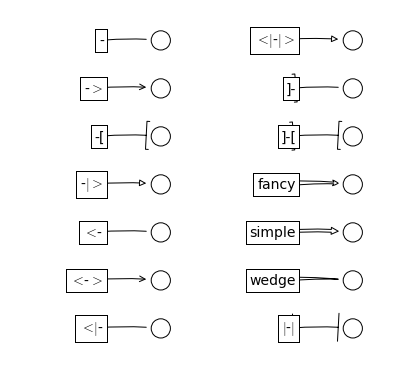

In [6]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

styles = mpatches.ArrowStyle.get_styles()

ncol=2
nrow = (len(styles)+1) // ncol
figheight = (nrow+0.5)
fig1 = plt.figure(1, (4.*ncol/1.5, figheight/1.5))
fontsize = 0.2 * 70


ax = fig1.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4*ncol)
ax.set_ylim(0, figheight)

def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s

for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i//nrow)*4
    y = (figheight - 0.7 - i%nrow) # /figheight
    p = mpatches.Circle((x, y), 0.2, fc="w")
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x-1.2, y),
                #xycoords="figure fraction", textcoords="figure fraction",
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="w", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)



plt.draw()
plt.show()